In [1]:
# importing libraries
import requests
import pandas as pd
import numpy as np
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import seaborn as sns

Feature one was to read in two data files. For the first data frame, I pulled in an API that listed all characters from the Harry Potter franchise. 
Read TWO data files (JSON, CSV, Excel, etc.)

In [2]:
#importing hogwarts data from api
r = requests.get("https://hp-api.onrender.com/api/characters")
hogwarts_df = pd.read_json("https://hp-api.onrender.com/api/characters")
hogwarts_df.head()


,id,name,alternate_names,species,gender,house,dateOfBirth,yearOfBirth,wizard,ancestry,eyeColour,hairColour,wand,patronus,hogwartsStudent,hogwartsStaff,actor,alternate_actors,alive,image
0,9e3f7ce4-b9a7-4244-b709-dae5c1f1d4a8,Harry Potter,"[The Boy Who Lived, The Chosen One]",human,male,Gryffindor,31-07-1980,1980.0,True,half-blood,green,black,"{'wood': 'holly', 'core': 'phoenix feather', '...",stag,True,False,Daniel Radcliffe,[],True,https://ik.imagekit.io/hpapi/harry.jpg
1,4c7e6819-a91a-45b2-a454-f931e4a7cce3,Hermione Granger,[],human,female,Gryffindor,19-09-1979,1979.0,True,muggleborn,brown,brown,"{'wood': 'vine', 'core': 'dragon heartstring',...",otter,True,False,Emma Watson,[],True,https://ik.imagekit.io/hpapi/hermione.jpeg
2,c3b1f9a5-b87b-48bf-b00d-95b093ea6390,Ron Weasley,[Dragomir Despard],human,male,Gryffindor,01-03-1980,1980.0,True,pure-blood,blue,red,"{'wood': 'willow', 'core': 'unicorn tail-hair'...",Jack Russell terrier,True,False,Rupert Grint,[],True,https://ik.imagekit.io/hpapi/ron.jpg
3,af95bd8a-dfae-45bb-bc69-533860d34129,Draco Malfoy,[],human,male,Slytherin,05-06-1980,1980.0,True,pure-blood,grey,blonde,"{'wood': 'hawthorn', 'core': 'unicorn tail-hai...",,True,False,Tom Felton,[],True,https://ik.imagekit.io/hpapi/draco.jpg
4,ca3827f0-375a-4891-aaa5-f5e8a5bad225,Minerva McGonagall,[],human,female,Gryffindor,04-10-1925,1925.0,True,half-blood,,black,"{'wood': 'fir', 'core': 'dragon heartstring', ...",tabby cat,False,True,Dame Maggie Smith,[],True,https://ik.imagekit.io/hpapi/mcgonagall.jpg


Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. I am viewing the "yearOfBirth" to see the minimum and max. 

In [3]:
hogwarts_df.describe()



,yearOfBirth
count,22.000000
mean,1955.818182
std,28.402945
min,1881.000000
25%,1950.250000
50%,1960.000000
75%,1979.750000
max,1981.000000


I am viewing dimensionality of the DataFrame to see the columns of the data frame. 

In [4]:
#viewing dimensionality of the DataFrame
print(hogwarts_df.shape)
hogwarts_df.head()

(402, 20)


,id,name,alternate_names,species,gender,house,dateOfBirth,yearOfBirth,wizard,ancestry,eyeColour,hairColour,wand,patronus,hogwartsStudent,hogwartsStaff,actor,alternate_actors,alive,image
0,9e3f7ce4-b9a7-4244-b709-dae5c1f1d4a8,Harry Potter,"[The Boy Who Lived, The Chosen One]",human,male,Gryffindor,31-07-1980,1980.0,True,half-blood,green,black,"{'wood': 'holly', 'core': 'phoenix feather', '...",stag,True,False,Daniel Radcliffe,[],True,https://ik.imagekit.io/hpapi/harry.jpg
1,4c7e6819-a91a-45b2-a454-f931e4a7cce3,Hermione Granger,[],human,female,Gryffindor,19-09-1979,1979.0,True,muggleborn,brown,brown,"{'wood': 'vine', 'core': 'dragon heartstring',...",otter,True,False,Emma Watson,[],True,https://ik.imagekit.io/hpapi/hermione.jpeg
2,c3b1f9a5-b87b-48bf-b00d-95b093ea6390,Ron Weasley,[Dragomir Despard],human,male,Gryffindor,01-03-1980,1980.0,True,pure-blood,blue,red,"{'wood': 'willow', 'core': 'unicorn tail-hair'...",Jack Russell terrier,True,False,Rupert Grint,[],True,https://ik.imagekit.io/hpapi/ron.jpg
3,af95bd8a-dfae-45bb-bc69-533860d34129,Draco Malfoy,[],human,male,Slytherin,05-06-1980,1980.0,True,pure-blood,grey,blonde,"{'wood': 'hawthorn', 'core': 'unicorn tail-hai...",,True,False,Tom Felton,[],True,https://ik.imagekit.io/hpapi/draco.jpg
4,ca3827f0-375a-4891-aaa5-f5e8a5bad225,Minerva McGonagall,[],human,female,Gryffindor,04-10-1925,1925.0,True,half-blood,,black,"{'wood': 'fir', 'core': 'dragon heartstring', ...",tabby cat,False,True,Dame Maggie Smith,[],True,https://ik.imagekit.io/hpapi/mcgonagall.jpg


I prefer snake case over camel case, so I fixed the columns on the data frame. Color is the preferred spelling in the United States over "colour".  I fixed those columns as well.  

In [5]:
fixed_columns = {
    'dateOfBirth':'date_of_birth',
    'yearOfBirth':'year_of_birth',
    'eyeColour':'eye_color',
    'hairColour':'hair_color',
    'hogwartsStudent':'hogwarts_student',
    'hogwartsStaff':'hogwarts_staff'
}

hogwarts_df.rename(columns=fixed_columns,inplace=True)
hogwarts_df.columns

Index(['id', 'name', 'alternate_names', 'species', 'gender', 'house',
       'date_of_birth', 'year_of_birth', 'wizard', 'ancestry', 'eye_color',
       'hair_color', 'wand', 'patronus', 'hogwarts_student', 'hogwarts_staff',
       'actor', 'alternate_actors', 'alive', 'image'],
      dtype='object')

For the second part of fearture one, "Read TWO data files (JSON, CSV, Excel, etc.)", I created an excel file of the data for characters from the video game "Hogwarts Legacy".  I am now reading that file in.

In [6]:
legacy_df = pd.read_excel("hogwartsleg.xlsx")
legacy_df.head()


,name,species,gender,house,NaN,year_of_birth,wizard,ancestry,eye_color,hair_color,patronus,hogwarts_student,hogwarts_staff
0,Amit Thakkar,human,male,Ravenclaw,NaN,1874.0,True,NaN,brown,brown,NaN,True,False
1,Everett Clopton,human,male,Ravenclaw,NaN,1874.0,True,half-blood,brown,brown,NaN,True,False
2,Lucan Brattleby,human,male,Gryffindor,NaN,1875.0,True,NaN,brown,brown,NaN,True,False
3,Mahendra Pehlwaan,human,male,Ravenclaw,NaN,NaN,True,muggleborn,brown,brown,NaN,True,False
4,Natsai Onai,human,female,Gryffindor,NaN,1874.0,True,NaN,brown,black,NaN,True,False


Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. I am viewing the "year_of_birth" to see the minimum and max for the second data frame.

In [7]:
legacy_df.describe()

,NaN,year_of_birth,patronus
count,0.0,14.000000,0.0
mean,NaN,1834.857143,NaN
std,NaN,125.285432,NaN
min,NaN,1401.000000,NaN
25%,NaN,1860.500000,NaN
50%,NaN,1873.000000,NaN
75%,NaN,1874.000000,NaN
max,NaN,1878.000000,NaN


Feature two is to "Clean your data and perform a pandas merge with your two data sets, then calculate some new values based on the new data set."  A concatenation of two or more data frames can be done using pandas.concat() method. Concat() in pandas works by combining Data Frames across rows or columns. We can concat two or more data frames either along rows  (axis=0) or along columns (axis=1). I am doing a concat along rows here.  

In [8]:
#combined data frame
df = pd.concat([hogwarts_df, legacy_df], axis=0)
print(df.shape)
df.head()

(433, 21)


,id,name,alternate_names,species,gender,house,date_of_birth,year_of_birth,wizard,ancestry,...,hair_color,wand,patronus,hogwarts_student,hogwarts_staff,actor,alternate_actors,alive,image,NaN
0,9e3f7ce4-b9a7-4244-b709-dae5c1f1d4a8,Harry Potter,"[The Boy Who Lived, The Chosen One]",human,male,Gryffindor,31-07-1980,1980.0,True,half-blood,...,black,"{'wood': 'holly', 'core': 'phoenix feather', '...",stag,True,False,Daniel Radcliffe,[],True,https://ik.imagekit.io/hpapi/harry.jpg,NaN
1,4c7e6819-a91a-45b2-a454-f931e4a7cce3,Hermione Granger,[],human,female,Gryffindor,19-09-1979,1979.0,True,muggleborn,...,brown,"{'wood': 'vine', 'core': 'dragon heartstring',...",otter,True,False,Emma Watson,[],True,https://ik.imagekit.io/hpapi/hermione.jpeg,NaN
2,c3b1f9a5-b87b-48bf-b00d-95b093ea6390,Ron Weasley,[Dragomir Despard],human,male,Gryffindor,01-03-1980,1980.0,True,pure-blood,...,red,"{'wood': 'willow', 'core': 'unicorn tail-hair'...",Jack Russell terrier,True,False,Rupert Grint,[],True,https://ik.imagekit.io/hpapi/ron.jpg,NaN
3,af95bd8a-dfae-45bb-bc69-533860d34129,Draco Malfoy,[],human,male,Slytherin,05-06-1980,1980.0,True,pure-blood,...,blonde,"{'wood': 'hawthorn', 'core': 'unicorn tail-hai...",,True,False,Tom Felton,[],True,https://ik.imagekit.io/hpapi/draco.jpg,NaN
4,ca3827f0-375a-4891-aaa5-f5e8a5bad225,Minerva McGonagall,[],human,female,Gryffindor,04-10-1925,1925.0,True,half-blood,...,black,"{'wood': 'fir', 'core': 'dragon heartstring', ...",tabby cat,False,True,Dame Maggie Smith,[],True,https://ik.imagekit.io/hpapi/mcgonagall.jpg,NaN


 To clean my data, I used the df drop feature to drop columns that was not compatable to the second data frame.  I saved the file as a csv.

In [9]:
df.drop(df.columns[[0, 2, 16, 17, 18, 19, 20]], axis=1, inplace=True)
print(df.shape)
df.head(2)



(433, 14)


,name,species,gender,house,date_of_birth,year_of_birth,wizard,ancestry,eye_color,hair_color,wand,patronus,hogwarts_student,hogwarts_staff
0,Harry Potter,human,male,Gryffindor,31-07-1980,1980.0,True,half-blood,green,black,"{'wood': 'holly', 'core': 'phoenix feather', '...",stag,True,False
1,Hermione Granger,human,female,Gryffindor,19-09-1979,1979.0,True,muggleborn,brown,brown,"{'wood': 'vine', 'core': 'dragon heartstring',...",otter,True,False


I am now reading in the new csv file and using the describe function. Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. I am calling this function to compair final data from the starting data frame.

In [10]:
df = pd.read_csv('hogwarts.csv')
df.describe()

,Unnamed: 0,year_of_birth
count,433.000000,35.000000
mean,187.219400,1906.771429
std,121.778185,100.162247
min,0.000000,1401.000000
25%,77.000000,1874.000000
50%,185.000000,1926.000000
75%,293.000000,1960.000000
max,401.000000,1981.000000


Feature 3 is to "Visualize / Present your data".Make 3 matplotlib or seaborn (or another plotting library) visualizations to display your data. I chose to make several seaborn visualizations. For the first visualization, I am looking at gender. It is clear that there are far more male characters than female characters. 

<AxesSubplot: xlabel='gender', ylabel='count'>

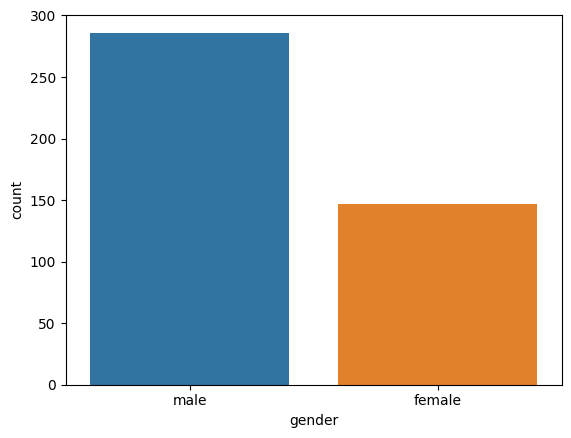

In [11]:

df = pd.read_csv('hogwarts.csv')
sns.countplot(x=df ["gender"])


For the second visualization, I am looking at characters by house. It is clear that most characters are in house Gryffindor, followed by Slytherin.

<AxesSubplot: xlabel='house', ylabel='count'>

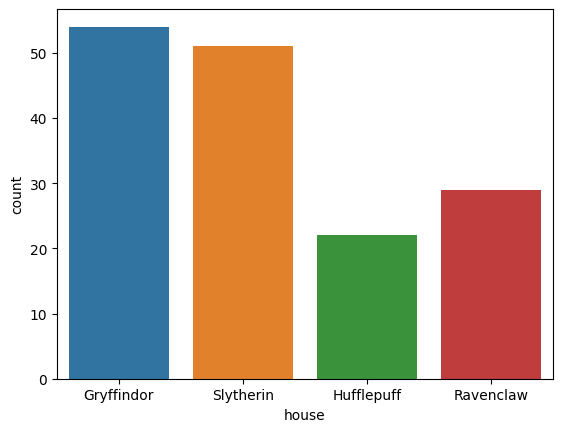

In [12]:
df = pd.read_csv('hogwarts.csv')
sns.countplot(x=df ["house"])

For the third visualization, I am looking to see how many of characters are Wizards (true), verses Non-Wizards (false). Most characters are Wizards.

<AxesSubplot: xlabel='wizard', ylabel='count'>

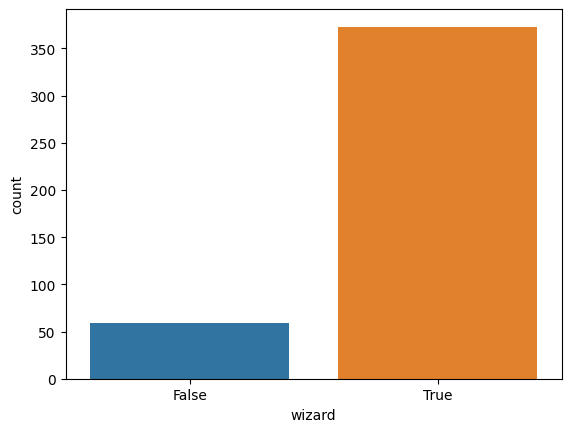

In [20]:
df = pd.read_csv('hogwarts.csv')
sns.countplot(x=df ["wizard"])

For the forth visualization, I am exploring character eye colors.  Most characters have brown eyes. Blue is the second most common eye color.  

<AxesSubplot: xlabel='eye_color', ylabel='count'>

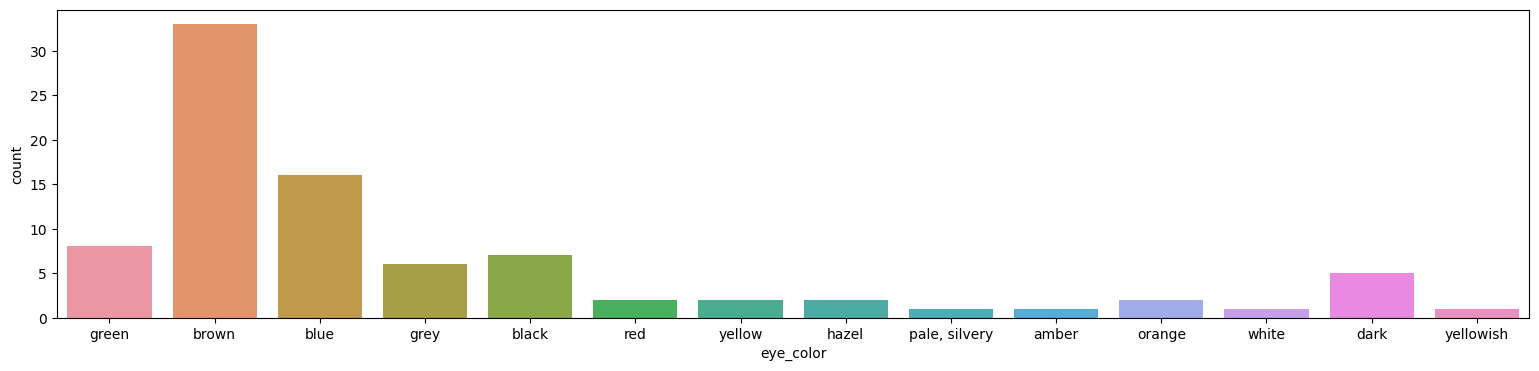

In [14]:
df = pd.read_csv('hogwarts.csv')
plt.figure(figsize=(19,4))
sns.countplot(x=df ["eye_color"])


For the fifth visualization, I am exploring year of birth.  The earliest birth was in 1401.  The latest birth was in 1981.

<AxesSubplot: xlabel='year_of_birth', ylabel='count'>

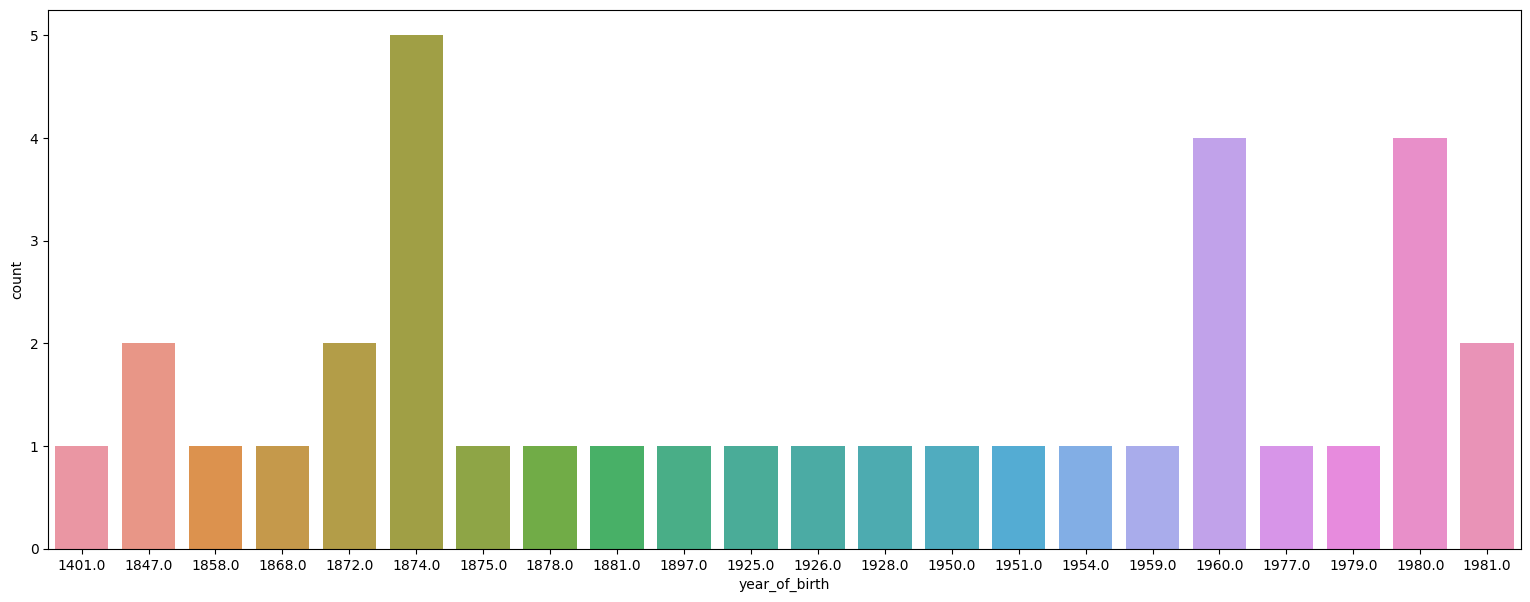

In [16]:
df = pd.read_csv('hogwarts.csv')
plt.figure(figsize=(19,7))
sns.countplot(x=df ["year_of_birth"])

 Feature four is to "Annotate your code with markdown cells in Jupyter Notebook". I am using the markdown sections to annotate my code.  